In [1]:
import torch
import torch.cuda as cuda
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.autograd import Variable
import numpy as np
from torchvision import datasets
from torchvision import transforms
import torch.nn.functional as F

In [2]:
mean = 0.0
stddev = 1.0
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((mean), (stddev))])

mnist_train = datasets.MNIST('./data', train=True, download=True, transform=transform)
mnist_valid = datasets.MNIST('./data', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:05<00:00, 1733292.81it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 95720.93it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:03<00:00, 478790.67it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2599690.06it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



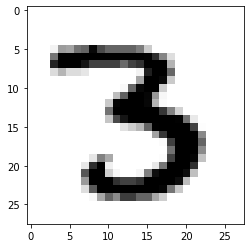

In [3]:
img = mnist_train[12][0].numpy()
## Điền ở đây trực quan hóa sao cho ra kết quả như bên dưới
img = np.reshape(img, (28, 28))
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()


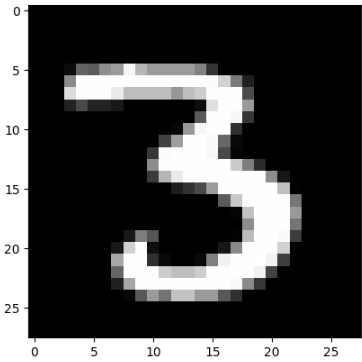

In [4]:
label = mnist_train[12][1]
print('Label of image above:', label)
# Reduce batch size if you get out-of-memory error
batch_size = 1024
mnist_train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2)
mnist_valid_loader = torch.utils.data.DataLoader(mnist_valid, batch_size=batch_size, shuffle=False, num_workers=2)

Label of image above: 3


In [7]:
class CNN_Model(nn.Module):

    def __init__(self):
        super().__init__()
         # Convolution Layer 1
         #điền ở đây                        # 24 x 24 x 20  (after 1st convolution)
         #điền ở đây                        # Same as above
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)      # 24 x 24 x 20  (after 1st convolution)
        self.relu1 = nn.ReLU()                            # Same as above

        # Convolution Layer 2
         #điền ở đây                                     # 20 x 20 x 20  (after 2nd convolution)
         #điền ở đây                                     # 10 x 10 x 20  (after pooling)
        #điền ở đây                                                # Same as above
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)     # 20 x 20 x 20  (after 2nd convolution)
        #self.conv2_drop = nn.Dropout2d(p=0.5)            # Dropout is a regularization technqiue we discussed in class
        self.maxpool2 = nn.MaxPool2d(2)                   # 10 x 10 x 20  (after pooling)
        self.relu2 = nn.ReLU()                            # Same as above


        # Fully connected layers
        self.fc1 = nn.Linear(2000, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # Convolution Layer 1
         #điền ở đây
         #điền ở đây

        # Convolution Layer 2
        #điền ở đây
        #điền ở đây
        #điền ở đây

        # Convolution Layer 1
        x = self.conv1(x)
        x = self.relu1(x)

        # Convolution Layer 2
        x = self.conv2(x)
        #x = self.conv2_drop(x)
        x = self.maxpool2(x)
        x = self.relu2(x)


        # Switch from activation maps to vectors
        x = x.view(-1, 2000)

        # Fully connected layer 1
        x = self.fc1(x)
        x = F.relu(x)

        # Fully connected layer 2
        x = self.fc2(x)

        return x

In [8]:
# The model
net = CNN_Model()

if cuda.is_available():
    net = net.cuda()

# Our loss function
criterion = nn.CrossEntropyLoss()

# Our optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [9]:
print(net)

CNN_Model(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu2): ReLU()
  (fc1): Linear(in_features=2000, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [10]:
num_epochs = 20

train_loss = []
valid_loss = []
train_accuracy = []
valid_accuracy = []

for epoch in range(num_epochs):

    iter_loss = 0.0
    correct = 0
    iterations = 0

    net.train()                   # Put the network into training mode

    for i, (items, classes) in enumerate(mnist_train_loader):

        # Convert torch tensor to Variable
        # items =  #điền ở đây
        # classes = #điền ở đây
        items = Variable(items)
        classes = Variable(classes)

        # If we have GPU, shift the data to GPU
        if cuda.is_available():
            items = items.cuda()
            classes = classes.cuda()

        optimizer.zero_grad()     # Clear off the gradients from any past operation
        outputs = net(items)      # Do the forward pass
        loss = criterion(outputs, classes) # Calculate the loss
        iter_loss += loss.item() # Accumulate the loss
        loss.backward()           # Calculate the gradients with help of back propagation
        optimizer.step()          # Ask the optimizer to adjust the parameters based on the gradients

        # Record the correct predictions for training data
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == classes.data).sum()
        iterations += 1

    # Record the training loss
    train_loss.append(iter_loss/iterations)
    # Record the training accuracy
    train_accuracy.append((100 * correct / float(len(mnist_train_loader.dataset))))

    loss = 0.0
    correct = 0
    iterations = 0

    net.eval()                   # Put the network into evaluate mode

    for i, (items, classes) in enumerate(mnist_valid_loader):

        # Convert torch tensor to Variable
        # items = #điền ở đây
        # classes = #điền ở đây
        items = Variable(items)
        classes = Variable(classes)

        # If we have GPU, shift the data to GPU
        if cuda.is_available():
            items = items.cuda()
            classes = classes.cuda()

        outputs = net(items)      # Do the forward pass
        loss += criterion(outputs, classes).item() # Calculate the loss

        # Record the correct predictions for training data
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == classes.data).sum()

        iterations += 1

    # Record the validation loss
    valid_loss.append(loss/iterations)
    # Record the validation accuracy
    correct_scalar = np.array([correct.clone().cpu()])[0]
    valid_accuracy.append(correct_scalar / len(mnist_valid_loader.dataset) * 100.0)

    print ('Epoch %d/%d, Tr Loss: %.4f, Tr Acc: %.4f, Val Loss: %.4f, Val Acc: %.4f'
           %(epoch+1, num_epochs, train_loss[-1], train_accuracy[-1],
             valid_loss[-1], valid_accuracy[-1]))

Epoch 1/20, Tr Loss: 2.2941, Tr Acc: 13.7150, Val Loss: 2.2799, Val Acc: 19.1500
Epoch 2/20, Tr Loss: 2.2542, Tr Acc: 21.7250, Val Loss: 2.2091, Val Acc: 29.2600
Epoch 3/20, Tr Loss: 2.0703, Tr Acc: 40.0433, Val Loss: 1.7737, Val Acc: 56.6000
Epoch 4/20, Tr Loss: 1.2120, Tr Acc: 72.6267, Val Loss: 0.7199, Val Acc: 82.3600
Epoch 5/20, Tr Loss: 0.5927, Tr Acc: 83.9850, Val Loss: 0.5522, Val Acc: 82.0300
Epoch 6/20, Tr Loss: 0.4901, Tr Acc: 85.0600, Val Loss: 0.4117, Val Acc: 88.6400
Epoch 7/20, Tr Loss: 0.4172, Tr Acc: 87.6600, Val Loss: 0.3816, Val Acc: 89.0900
Epoch 8/20, Tr Loss: 0.3991, Tr Acc: 87.9967, Val Loss: 0.3816, Val Acc: 88.6300
Epoch 9/20, Tr Loss: 0.3682, Tr Acc: 89.1167, Val Loss: 0.3502, Val Acc: 90.0900
Epoch 10/20, Tr Loss: 0.3664, Tr Acc: 88.9950, Val Loss: 0.3217, Val Acc: 90.6700
Epoch 11/20, Tr Loss: 0.3352, Tr Acc: 90.2667, Val Loss: 0.3073, Val Acc: 91.0600
Epoch 12/20, Tr Loss: 0.3273, Tr Acc: 90.3000, Val Loss: 0.2999, Val Acc: 91.3800
Epoch 13/20, Tr Loss: 0.3

In [11]:
# save the model
torch.save(net.state_dict(), "./3.model.pth")

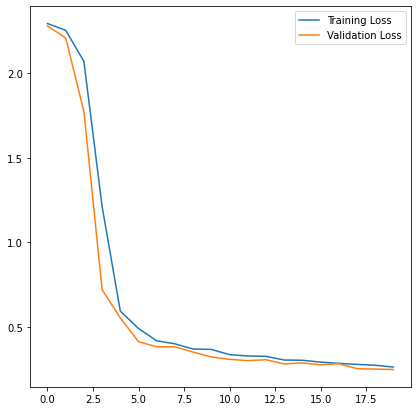

In [12]:
# Plot loss curves
#điền ở đây
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.plot(range(num_epochs), train_loss, label='Training Loss')
plt.plot(range(num_epochs), valid_loss, label='Validation Loss')
plt.legend()

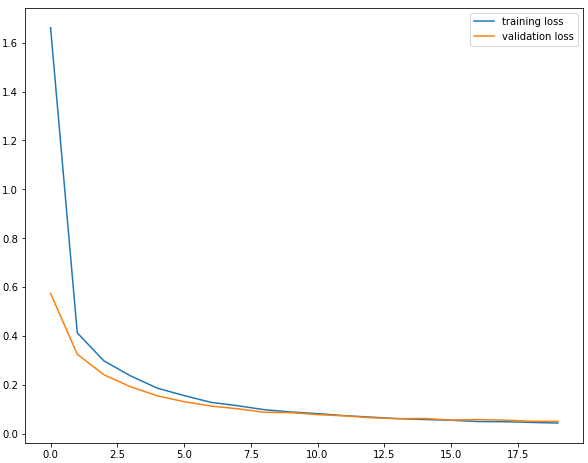

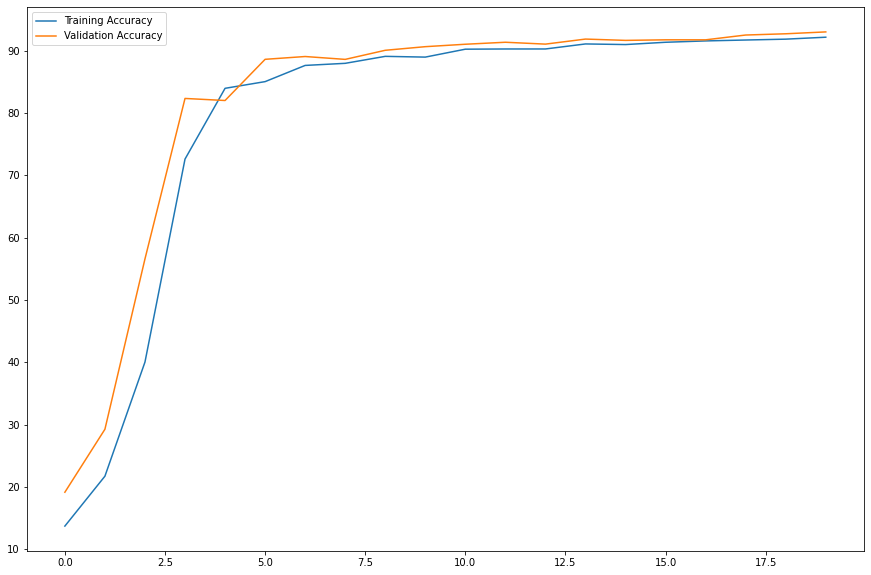

In [19]:
# Plot accuracy curves
plt.figure(figsize=(15, 10))
plt.plot(range(num_epochs), train_accuracy, label='Training Accuracy')
plt.plot(range(num_epochs), valid_accuracy, label='Validation Accuracy')
plt.legend()
plt.show()

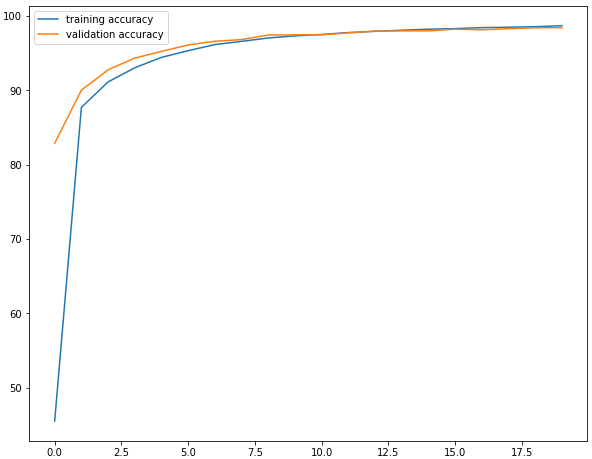

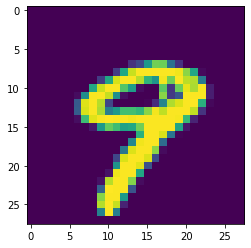

In [20]:
image_index = 9
img = mnist_valid[image_index][0].resize_((1, 1, 28, 28))
img = Variable(img)
label = mnist_valid[image_index][1]
plt.imshow(img[0,0])
net.eval()

if cuda.is_available():
    net = net.cuda()
    img = img.cuda()
else:
    net = net.cpu()
    img = img.cpu()

output = net(img)

In [21]:
output

tensor([[ -2.3678, -16.2843,  -4.4583,  -2.5974,   4.2491,  -0.9248,  -3.9910,
           6.3812,   1.8720,   7.5739]], grad_fn=<AddmmBackward0>)

In [22]:
_, predicted = torch.max(output.data, 1)
print("Predicted label:", predicted[0].item())
print("Actual label:", label)

Predicted label: 9
Actual label: 9
